In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import math
import os
import csv
from itertools import chain
from pprint import pprint
import glob
from matplotlib.lines import Line2D

pe_df = pd.DataFrame()
folder = '/home/mremington/Documents/ml_pipeline/results/'
# Use glob to find all CSV files in the specified folder

csv_files = glob.glob(folder + "*.csv")

# Iterate over each CSV file found
for csv_file in csv_files:
    # Read the current CSV file into a temporary DataFrame
    temp_df = pd.read_csv(csv_file, header=0)
    
    # Extract the file name from the path
    file_name = os.path.basename(csv_file)
    
    # Split the file name into parts based on the underscore
    parts = file_name.split('_')
    
    temp_df['ml_method'] = parts[0]
    if parts[1]=='imp':
        temp_df['data_granularity'] = 15
    else:
        temp_df['data_granularity'] = 70
        
    
    
    # Concatenate the temporary DataFrame with the main DataFrame
    pe_df = pd.concat([pe_df, temp_df], ignore_index=True)


In [2]:
pe_df = pe_df.loc[:, ~pe_df.columns.str.contains('test', case=False)]
pe_df =pe_df[pe_df['auc_val'] != 1]
pe_df =pe_df[pe_df['TN_val'] >= 10]

In [3]:
pe_df.head()

,site_label,rbp_label,para_est_label,window_size,accuracy_val,precision_val,recall_val,f1_val,TP_val,FP_val,TN_val,FN_val,auc_val,ml_method,data_granularity
0,Canada,random,np,3.0,0.591736,0.604555,0.839080,0.702768,292,191,66,56,0.609978,rnn,15
1,Canada,random,np,4.0,0.460265,0.789474,0.086207,0.155440,30,8,248,318,0.622284,rnn,15
2,Canada,random,np,5.0,0.424544,0.600000,0.008621,0.016997,3,2,253,345,0.602862,rnn,15
3,Canada,random,np,6.0,0.425249,0.600000,0.017241,0.033520,6,4,250,342,0.596010,rnn,15
4,Canada,random,np,7.0,0.429285,1.000000,0.014368,0.028329,5,0,253,343,0.605527,rnn,15


In [4]:
pe_df.sort_values(by='accuracy_val', ascending=False).head(10)

,site_label,rbp_label,para_est_label,window_size,accuracy_val,precision_val,recall_val,f1_val,TP_val,FP_val,TN_val,FN_val,auc_val,ml_method,data_granularity
233,Texas-Marathon,preference,p,NaN,0.716667,0.547619,0.605263,0.575000,23,19,63,15,0.723363,rf,70
232,Texas-Marathon,preference,np,NaN,0.691667,0.545455,0.157895,0.244898,6,5,77,32,0.548460,rf,70
208,Texas-Marathon,preference,np,NaN,0.690217,0.457143,0.095238,0.157635,16,19,365,152,0.522732,rf,15
107,Texas-Marathon,random,p,6.0,0.688645,0.000000,0.000000,0.000000,0,2,376,168,0.431957,rnn,15
349,Texas-Marathon,random,p,8.0,0.687500,0.560000,0.368421,0.444444,14,11,63,24,0.692390,rnn,70
337,Texas-Marathon,random,np,4.0,0.672414,0.000000,0.000000,0.000000,0,0,78,38,0.688428,rnn,70
350,Texas-Marathon,random,p,9.0,0.666667,0.509434,0.710526,0.593407,27,26,47,11,0.697549,rnn,70
346,Texas-Marathon,random,p,5.0,0.660870,0.489796,0.631579,0.551724,24,25,52,14,0.732057,rnn,70
341,Texas-Marathon,random,np,8.0,0.660714,0.500000,0.657895,0.568182,25,25,49,13,0.669630,rnn,70
348,Texas-Marathon,random,p,7.0,0.654867,0.490196,0.657895,0.561798,25,26,49,13,0.652281,rnn,70


In [17]:
#### Figures

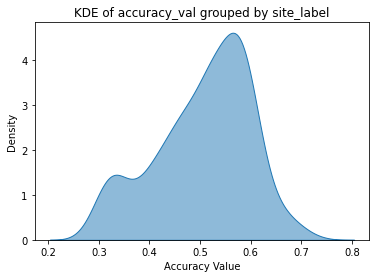

In [5]:
# Assuming your DataFrame is named df
# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

In [7]:
%matplotlib
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))


# Plotting KDEs for each site_label
sns_plot = sns.kdeplot(data=pe_df, x='accuracy_val', hue='site_label', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Machine Learning Model Pipeline Accuracy Distributions')


palette = sns.color_palette()  # This gets the default palette used in the plot

# Manually create proxy artists for the legend using the same colors as the plot
custom_lines = [
    Line2D([0], [0], color=palette[0], lw=4),  # Color for 'Canada'
    Line2D([0], [0], color=palette[1], lw=4),  # Color for 'Nebraska'
    Line2D([0], [0], color=palette[2], lw=4),  # Color for 'Texas-Marathon'
    Line2D([0], [0], color=palette[3], lw=4)   # Color for 'Total'
]
# Manually create the legend with custom labels
plt.legend(custom_lines, ["Canada", "Nebraska", "Texas-Marathon", "Total"], title="Site Label")

# Save the plot before displaying it
#plt.savefig("Figures/mlkde.png")


# Display the KDE plot
plt.show()

Using matplotlib backend: TkAgg


In [19]:
# Set up the figure with a grid layout (2x1)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: KDE for site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='site_label', fill=True, common_norm=False, alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Density')
axes[0].set_title('By Site')

# Add label A) to the first plot
axes[0].annotate('A)', xy=(0, 1), xycoords='axes fraction', fontsize=14, fontweight='bold', 
                 xytext=(-10, 10), textcoords='offset points', ha='right', va='top')

# Custom legend for plot 1
palette = sns.color_palette()
custom_lines = [
    Line2D([0], [0], color=palette[0], lw=4),  
    Line2D([0], [0], color=palette[1], lw=4),  
    Line2D([0], [0], color=palette[2], lw=4),  
    Line2D([0], [0], color=palette[3], lw=4)   
]
axes[0].legend(custom_lines, ["Canada", "Nebraska", "Texas-Marathon", "Total"], title="Site Label")

# Plot 2: KDE for rbp_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='rbp_label', fill=True, common_norm=False, alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Accuracy')
axes[1].set_ylabel('Density')
axes[1].set_title('By Sub-Model')

# Add label B) to the second plot
axes[1].annotate('B)', xy=(0, 1), xycoords='axes fraction', fontsize=14, fontweight='bold', 
                 xytext=(-10, 10), textcoords='offset points', ha='right', va='top')

axes[1].legend(custom_lines, ["Random", "Boundary", "Preferred"], title="Sub-Model")

# Add a supertitle
plt.suptitle('Machine Learning Model Pipeline Accuracy Distributions ', fontsize=16)

# Adjust layout and show the plot grid
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the supertitle

# Save the plot
plt.savefig("/home/mremington/Documents/therma_sim/ibutton_data_analysis/Figures/mlkde.png")

# Display the grid plot
plt.show()


In [10]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='data_granularity', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='site_label', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

In [11]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='para_est_label', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by para_est_label')

# Displaying the KDE plot
plt.show()

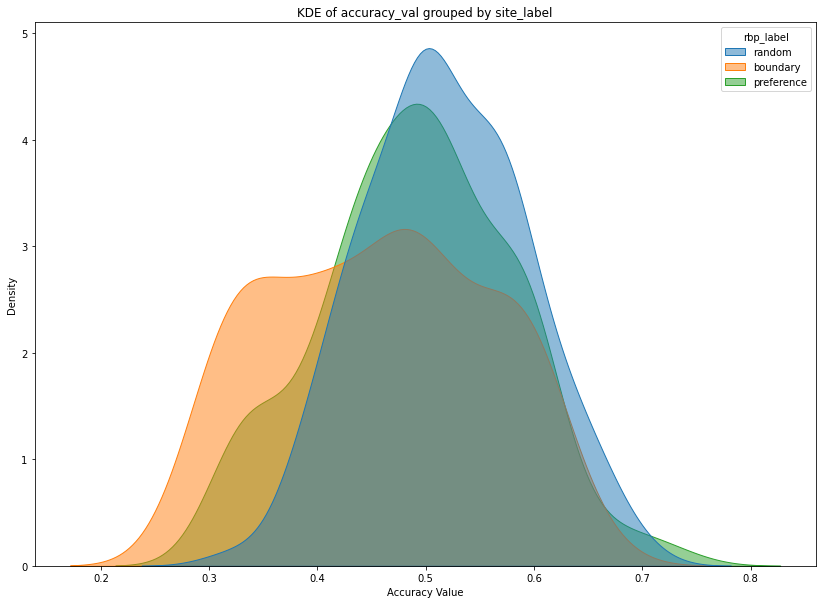

In [27]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='rbp_label', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

In [12]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='ml_method', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

In [20]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=pe_df, x='accuracy_val', hue='window_size', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

### Total

In [21]:
### Total
total_df = pe_df[pe_df['site_label'] == 'total']
total_df.sort_values(by='accuracy_val', ascending=False).head(10)

,site_label,rbp_label,para_est_label,window_size,accuracy_val,precision_val,recall_val,f1_val,TP_val,FP_val,TN_val,FN_val,auc_val,ml_method,data_granularity
213,total,boundary,p,NaN,0.611020,0.541520,0.851103,0.661901,463,392,280,81,0.627439,rf,15
398,total,random,p,9.0,0.610236,0.582278,0.410714,0.481675,46,33,109,66,0.610915,rnn,70
239,total,preference,p,NaN,0.608365,0.560000,0.486957,0.520930,56,44,104,59,0.598913,rf,70
393,total,random,p,4.0,0.606178,0.576471,0.426087,0.490000,49,36,108,66,0.627748,rnn,70
188,total,preference,p,7.0,0.605459,0.560360,0.571691,0.565969,311,244,421,233,0.617250,rnn,15
389,total,random,np,8.0,0.603922,0.588235,0.353982,0.441989,40,28,114,73,0.624704,rnn,70
186,total,preference,p,5.0,0.603633,0.553691,0.606618,0.578947,330,266,401,214,0.620327,rnn,15
187,total,preference,p,6.0,0.603306,0.554983,0.593750,0.573712,323,259,407,221,0.612152,rnn,15
399,total,random,p,10.0,0.600791,0.550000,0.495495,0.521327,55,45,97,56,0.653788,rnn,70
387,total,random,np,6.0,0.599222,0.556818,0.433628,0.487562,49,39,105,64,0.616581,rnn,70


In [15]:
# Assuming your DataFrame is named df
# Plotting KDEs for each site_label
sns.kdeplot(data=total_df, x='accuracy_val', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by site_label')

# Displaying the KDE plot
plt.show()

In [16]:
plt.figure(figsize=(14, 10))

# Plotting KDEs for each site_label
sns.kdeplot(data=total_df, x='accuracy_val', hue='para_est_label', fill=True, common_norm=False, alpha=0.5)

# Adding labels and title
plt.xlabel('Accuracy Value')
plt.ylabel('Density')
plt.title('KDE of accuracy_val grouped by para_est_label')

# Displaying the KDE plot
plt.show()